0.3315841719257886
0.7886803636032268
0.7613460917279646
0.5366954485955654


/home/cboned/miniconda3/envs/neuralangelo/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 7 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


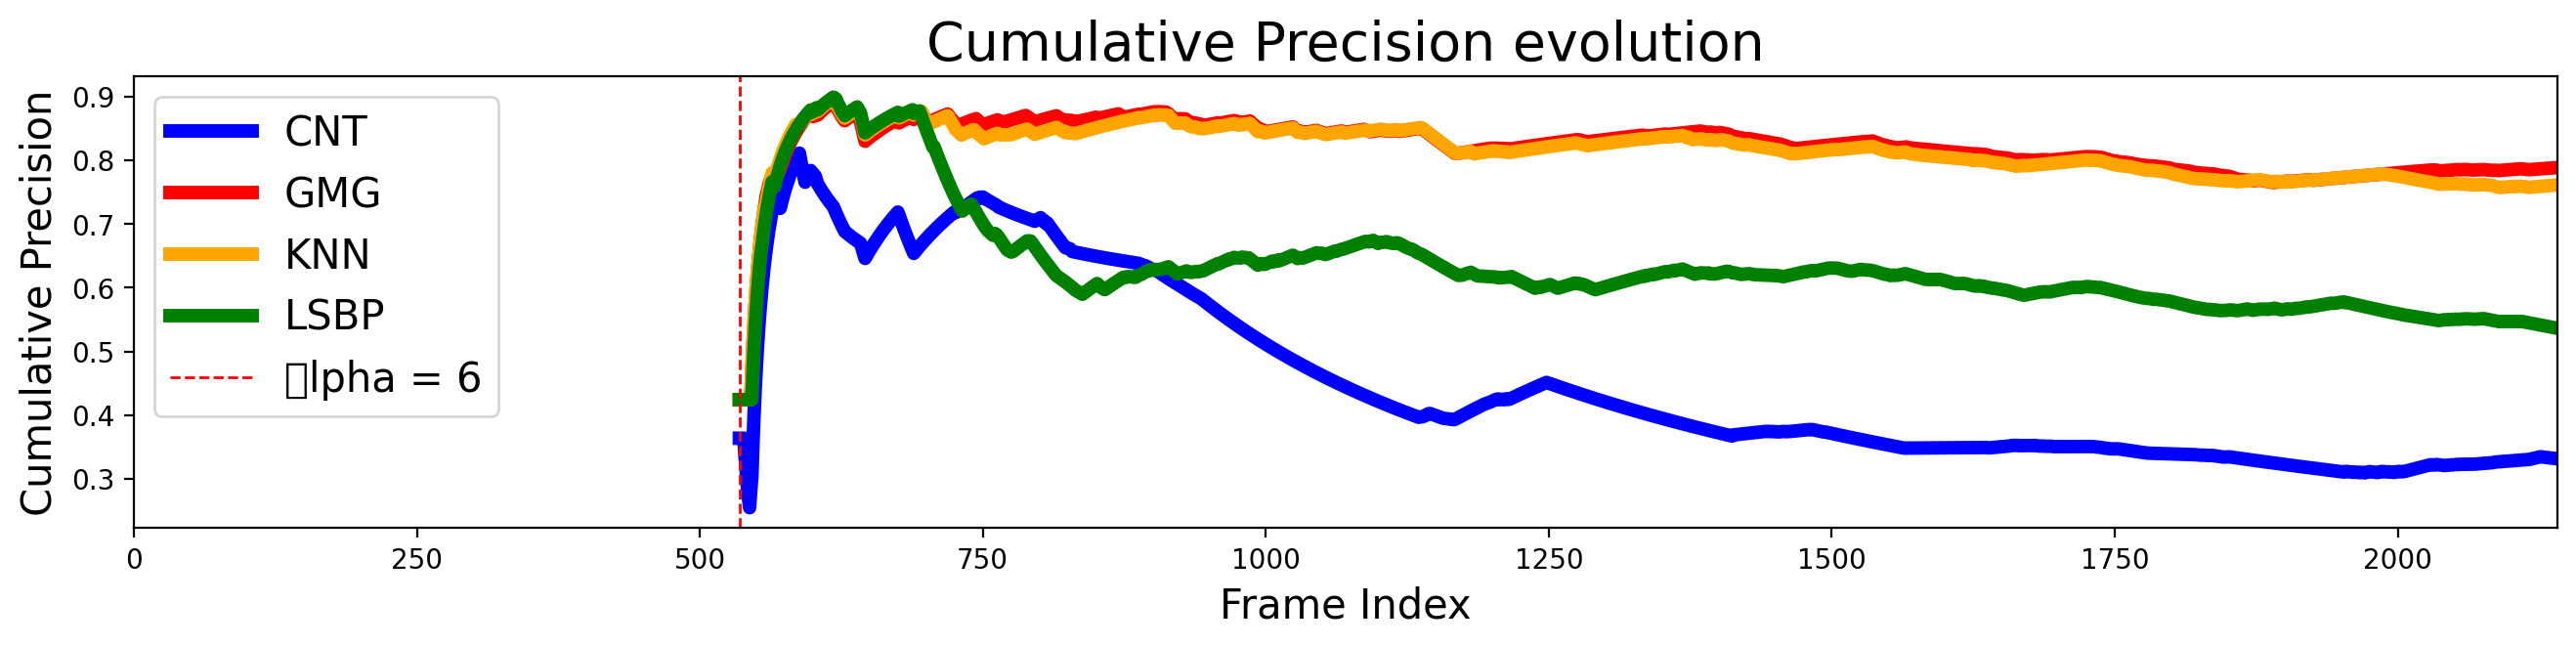

In [7]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

total_frames = 2141
start_frame = 535

filename = '../images/results/results_0.01_3.5_ap.pkl'
with open(filename, 'rb') as file:
    precision_list_00135 = pickle.load(file)
    
print(np.mean(precision_list_00135))
cumulative_00135 = [sum(precision_list_00135[:i+1])/len(precision_list_00135[:i+1]) for i in range(len(precision_list_00135))]



filename = '../images/results/results_0.2_3.5_ap.pkl'
with open(filename, 'rb') as file:
    precision_list_0235 = pickle.load(file)
    
cumulative_0235 = [sum(precision_list_0235[:i+1])/len(precision_list_0235[:i+1]) for i in range(len(precision_list_0235))]

print(np.mean(precision_list_0235))

filename = '../images/results/results_0.3_3.5_ap.pkl'
with open(filename, 'rb') as file:
    precision_list_0335 = pickle.load(file)
print(np.mean(precision_list_0335))
cumulative_0335 = [sum(precision_list_0335[:i+1])/len(precision_list_0335[:i+1]) for i in range(len(precision_list_0335))]


filename = '../images/results/results_0.5_3.5_ap.pkl'
with open(filename, 'rb') as file:
    precision_list_0435 = pickle.load(file)
print(np.mean(precision_list_0435))
cumulative_0435 = [sum(precision_list_0435[:i+1])/len(precision_list_0435[:i+1]) for i in range(len(precision_list_0435))]



frame_indices = list(range(start_frame, start_frame + len(precision_list_00135)))

%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(16, 3))

#plt.fill_between(frame_indices, precision_list_00135, color='blue', alpha=0.2)  # Adjust alpha for opacity as desired
#plt.fill_between(frame_indices, precision_list_a6, color='orange', alpha=0.2)  # Adjust alpha for opacity as desired
#plt.fill_between(frame_indices, precision_list_a10, color='green', alpha=0.2)  # Adjust alpha for opacity as desired

#plt.plot(frame_indices, cumulative_00135, color='blue', ls= '-', label="CNT", linewidth=5)
#plt.plot(frame_indices, cumulative_0235, color='red', ls= '-', label="GMG", linewidth=5)
#plt.plot(frame_indices, cumulative_0335, color='orange', ls= '-', label="KNN", linewidth=5)
#plt.plot(frame_indices, cumulative_0435, color='green', ls= '-', label="LSBP", linewidth=5)
#plt.plot(frame_indices, cumulative_MOG, color='purple', ls= '-', label="MOG", linewidth=5)
#plt.plot(frame_indices, cumulative_MOG2, color='brown', ls= '-', label="MOG2", linewidth=5)

plt.axvline(x=start_frame, color='red', linestyle='--', linewidth=1, label='\alpha = 6')

plt.title('Cumulative Precision evolution', fontsize=20)
plt.xlabel('Frame Index', fontsize=15)
plt.ylabel('Cumulative Precision', fontsize=15)
plt.legend(fontsize=15)

plt.xlim(0, total_frames)

plt.show()


In [2]:
!pwd

/home/cboned/Desktop/Master/mcv-c6-2024-team6/task2


alpha 2 => recall avg = 0.17669157326691573
alpha 4 => recall avg = 0.26426940639269236
alpha 6 => recall avg = 0.2407015359070148
alpha 8 => recall avg = 0.16478829389788335
alpha 10 => recall avg = 0.07081776670817773
alpha 12 => recall avg = 0.04335823993358242
alpha 14 => recall avg = 0.027023661270236598


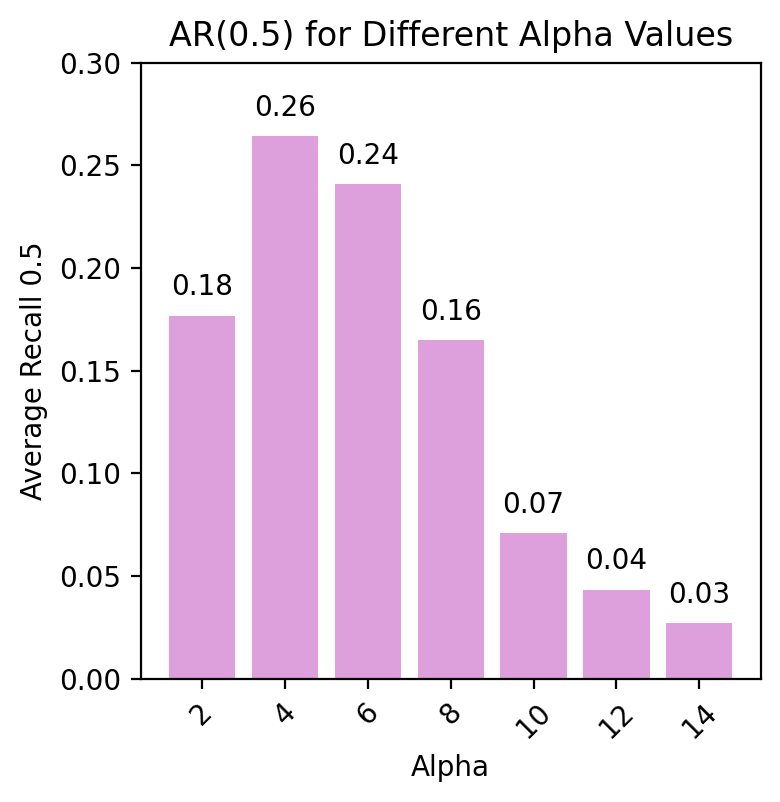

In [74]:
alpha_precisions = {}

for i in range(2, 16, 2):
    filename = f'./AR_alpha_{i}.pkl'
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    precision_list_a2 = data['recall_list']
    alpha_precisions[str(i)] = sum(precision_list_a2) / len(precision_list_a2)
    print(f"alpha {i} => recall avg = {sum(precision_list_a2) / len(precision_list_a2)}")


alphas = list(alpha_precisions.keys())
avg_precisions = list(alpha_precisions.values())

plt.figure(figsize=(4, 4))
plt.bar(alphas, avg_precisions, color='plum')

plt.title('AR(0.5) for Different Alpha Values')
plt.xlabel('Alpha')
plt.ylabel('Average Recall 0.5')
plt.ylim(0, 0.3)


for i in range(len(alphas)):
    plt.text(i, avg_precisions[i] + 0.01, f"{avg_precisions[i]:.2f}", ha = 'center')

plt.xticks(rotation=45)
plt.show()


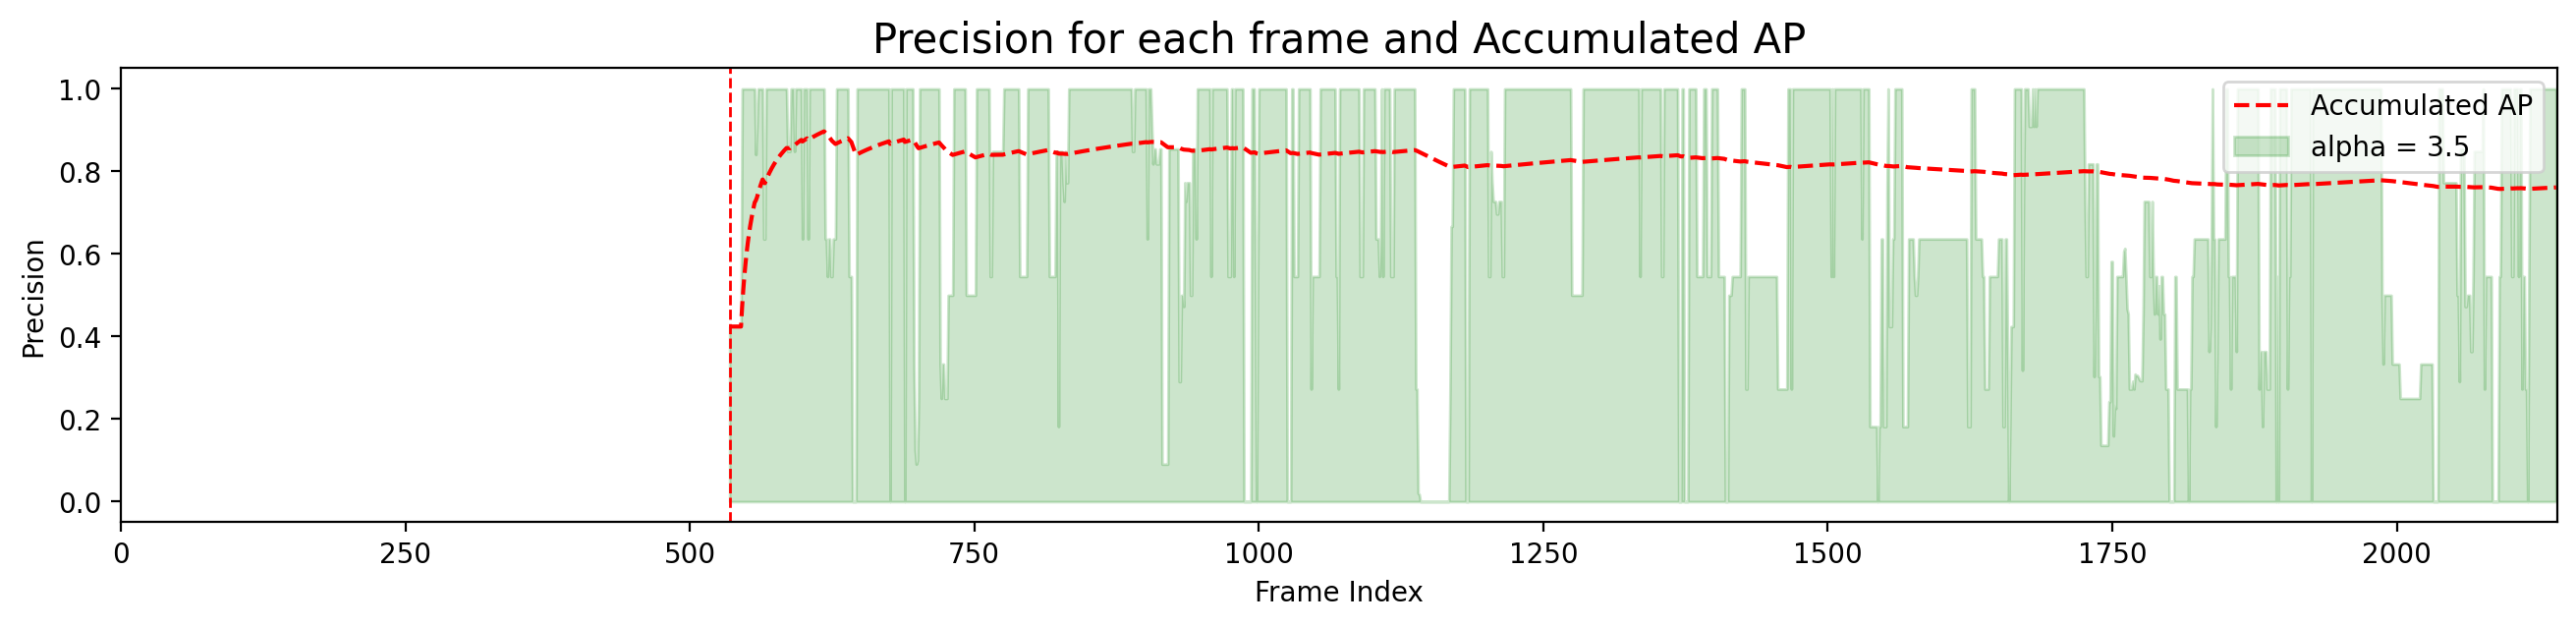

In [8]:
import matplotlib.pyplot as plt
import pickle

total_frames = 2141
start_frame = 535

filename = '../images/results/results_0.3_3.5_ap.pkl'
with open(filename, 'rb') as file:
    precision_list = pickle.load(file)


frame_indices = list(range(start_frame, start_frame + len(precision_list)))

%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(16, 3))

acc = []
mean_ = []
for prec in precision_list: 
    acc.append(prec)
    current_mean = sum(acc) / len(acc)
    mean_.append(current_mean)

# plot accumulated mean
plt.plot(frame_indices, mean_, color='red', linestyle='--')
plt.fill_between(frame_indices, precision_list, color='green', alpha=0.2) 
#plt.fill_between(frame_indices, precision_list_a6, color='orange', alpha=0.2)
#plt.fill_between(frame_indices, precision_list_a10, color='green', alpha=0.2)

plt.axvline(x=start_frame, color='red', linestyle='--', linewidth=1)

plt.title('Precision for each frame and Accumulated AP', fontsize=15)
plt.xlabel('Frame Index')
plt.ylabel('Precision')
plt.legend(['Accumulated AP', 'alpha = 3.5'], loc='upper right', bbox_to_anchor=(1.0, 1.0))

plt.xlim(0, total_frames)

plt.show()